
# COVID-19による人流の変化

Googleが公開しているコミュニティモビリティレポートのデータを用いてテーブルデータの基本的な統計情報を可視化してみましょう。

Google LLC "Google COVID-19 Community Mobility Reports".
https://www.google.com/covid19/mobility/ Accessed: July-19, 2020.


このデータは、さまざまな場所における訪問数と滞在時間が、基準値と比較してどのように変化しているかを示しています。
カテゴリは、次の6つに分かれています。

1. 食料品店、薬局（食料品店、食品問屋、青果市場、高級食料品店、ドラッグストア、薬局など）
2. 公園（地域の公園、国立公園、公共のビーチ、マリーナ、ドッグパーク、広場、庭園など）
3. 乗換駅（公共交通機関の拠点（例: 地下鉄、バス、電車の駅）など）
4. 小売、娯楽（レストラン、カフェ、ショッピング センター、テーマパーク、博物館、図書館、映画館など）
5. 住宅
6. 職場

基準値は、2020 年 1 月 3 日～2 月 6 日の 5 週間における該当曜日の中央値になります。

データの詳細は、https://www.google.com/covid19/mobility/data_documentation.html からご確認ください


In [1]:
import geopandas as gpd
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd
import pycountry
%matplotlib inline

In [2]:
df = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')

/Users/yuyashibu/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.keys()

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'iso_3166_2_code', 'census_fips_code', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

まずは、`date`列をpandasの`datetime`型に変換します。

In [4]:
df.loc[:, 'date'] = pd.to_datetime(df['date'])

In [5]:
df['date'].describe()

count                  682266
unique                    151
top       2020-04-02 00:00:00
freq                     4751
first     2020-02-15 00:00:00
last      2020-07-14 00:00:00
Name: date, dtype: object

## 2020年日本国内のモビリティトレンドの把握

国内のデータのみを抽出して、新たなdataframe`JP`に格納します。

In [6]:
JP = df[df['country_region_code'].isin(['JP'])]

In [7]:
# `sub_region_1`という列に都道府県名が入っています。
JP['sub_region_1'].unique()

array([nan, 'Aichi', 'Akita', 'Aomori', 'Chiba', 'Ehime', 'Fukui',
       'Fukuoka', 'Fukushima', 'Gifu', 'Gunma', 'Hiroshima', 'Hokkaido',
       'Hyogo', 'Ibaraki', 'Ishikawa', 'Iwate', 'Kagawa', 'Kagoshima',
       'Kanagawa', 'Kochi', 'Kumamoto', 'Kyoto', 'Mie', 'Miyagi',
       'Miyazaki', 'Nagano', 'Nagasaki', 'Nara', 'Niigata', 'Oita',
       'Okayama', 'Okinawa', 'Osaka', 'Saga', 'Saitama', 'Shiga',
       'Shimane', 'Shizuoka', 'Tochigi', 'Tokushima', 'Tokyo', 'Tottori',
       'Toyama', 'Wakayama', 'Yamagata', 'Yamaguchi', 'Yamanashi'],
      dtype=object)

In [8]:
# 都道府県ごとに何日分のデータが入っているか確認してみましょう。

JP.groupby(['sub_region_1'])['date'].size()

sub_region_1
Aichi        151
Akita        151
Aomori       151
Chiba        151
Ehime        151
Fukui        151
Fukuoka      151
Fukushima    151
Gifu         151
Gunma        151
Hiroshima    151
Hokkaido     151
Hyogo        151
Ibaraki      151
Ishikawa     151
Iwate        151
Kagawa       151
Kagoshima    151
Kanagawa     151
Kochi        151
Kumamoto     151
Kyoto        151
Mie          151
Miyagi       151
Miyazaki     151
Nagano       151
Nagasaki     151
Nara         151
Niigata      151
Oita         151
Okayama      151
Okinawa      151
Osaka        151
Saga         151
Saitama      151
Shiga        151
Shimane      151
Shizuoka     151
Tochigi      151
Tokushima    151
Tokyo        151
Tottori      151
Toyama       151
Wakayama     151
Yamagata     151
Yamaguchi    151
Yamanashi    151
Name: date, dtype: int64

In [9]:
# その他の基本統計量を確認します。
JP.describe()

,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,0.0,7248.000000,7248.000000,7248.000000,7248.000000,7248.000000,7248.000000
mean,NaN,-12.595199,0.850717,-0.101959,-27.590646,-11.699779,6.854029
std,NaN,12.586230,5.214305,24.280198,16.354727,13.270008,5.204545
min,NaN,-72.000000,-34.000000,-76.000000,-78.000000,-81.000000,-2.000000
25%,NaN,-20.000000,-2.000000,-15.000000,-38.000000,-15.000000,3.000000
50%,NaN,-10.000000,1.000000,1.000000,-25.000000,-8.000000,5.000000
75%,NaN,-4.000000,4.000000,14.000000,-17.000000,-4.000000,9.000000
max,NaN,34.000000,25.000000,122.000000,34.000000,11.000000,37.000000


In [10]:
# ヒストグラムで図示するデータの列名をリストに格納します。
target_columns = ['retail_and_recreation_percent_change_from_baseline',
                  'grocery_and_pharmacy_percent_change_from_baseline',
                  'parks_percent_change_from_baseline',
                  'transit_stations_percent_change_from_baseline',
                  'workplaces_percent_change_from_baseline',
                  'residential_percent_change_from_baseline']
fig, axs = plt.subplots(2,3,figsize=(10,5))
axs = axs.flatten()
for i, column in enumerate(target_columns):
    df_fig = JP[column]
    ax = axs[i]
    ax.hist(df_fig, color = 'blue', alpha = .3)
    # 0（基準値）を明示するために、垂直方向の直線を`vlines`を使って引きます
    ax.vlines(0, ymin = 0, ymax = 30000, color = 'red')
    title = ' '.join(column.split('_'))
    title = title.replace('percent change from baseline', '')
    ax.set_title(title, loc='center', wrap=True)
    ax.set_ylim(0, 30000)
plt.tight_layout()
plt.show()

### 全国のモビリティの経時変化をプロットしてみましょう

In [12]:
def plot_all_japan_mobility(column, df=JP):
    plt.figure(figsize=(30,7))
    # plot only data from 2020-2-15 to 2021
    df = df[df['date']<'2021-01-01']
    data = [df.loc[df['date'].isin([x]), column] for x in df['date'].unique()]
    # plt.hlines(0, xmin=-1, xmax=df['date'].nunique(), color = 'red')
    plt.axhline(0, color = 'red', linestyle='-')
    plt.boxplot(data, 
                labels = list(df['date'].dt.date.unique()),
                showmeans=True)
    title = ' '.join(column.split('_'))
    plt.title('BoxPlot of {}'.format(title), size=18)
    plt.ylabel('pct change',size=15)
    plt.xlabel('date',size=15)
    plt.yticks(size=10)
    locs, labels = plt.xticks()
    # only show weekly xtick labels
    xtick_labels = [x if i % 7 ==0 else '' for i, x in enumerate(labels)]
    plt.xticks(ticks=locs, labels=xtick_labels, size=12, rotation= 60, ha='right')
    plt.grid() 
    plt.savefig('fig_{}.jpg'.format(column))
    plt.show()

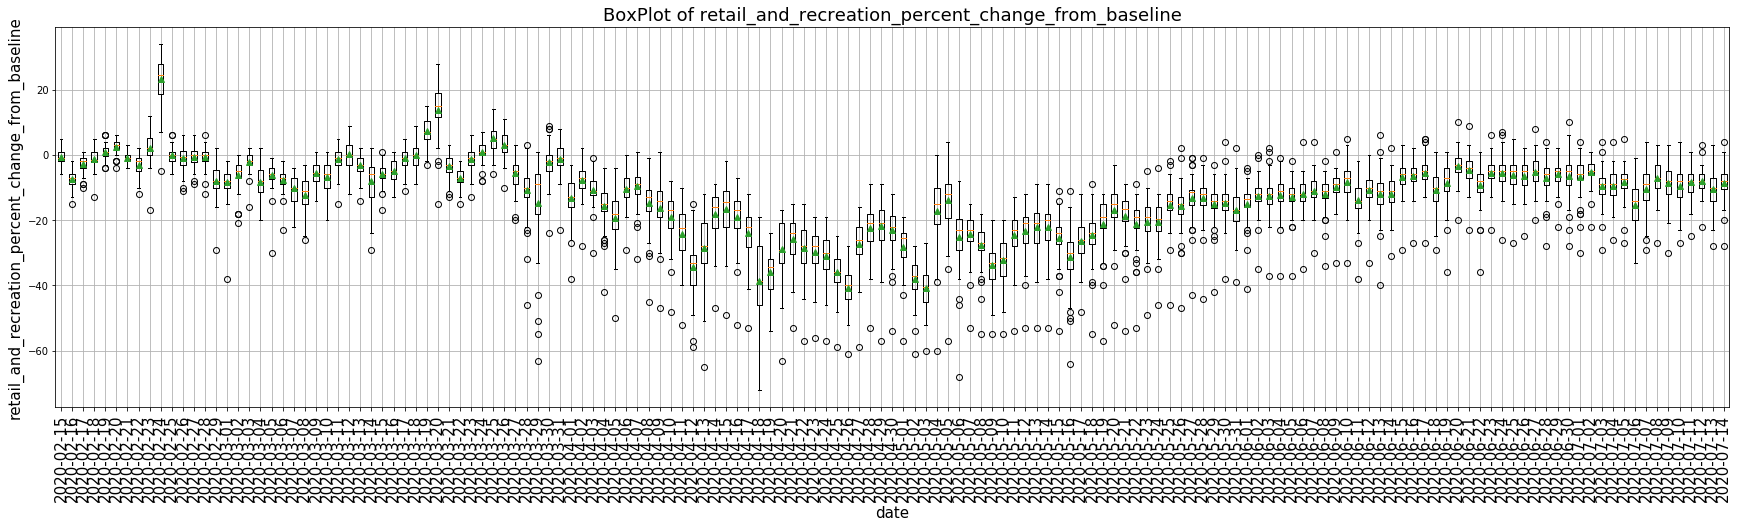

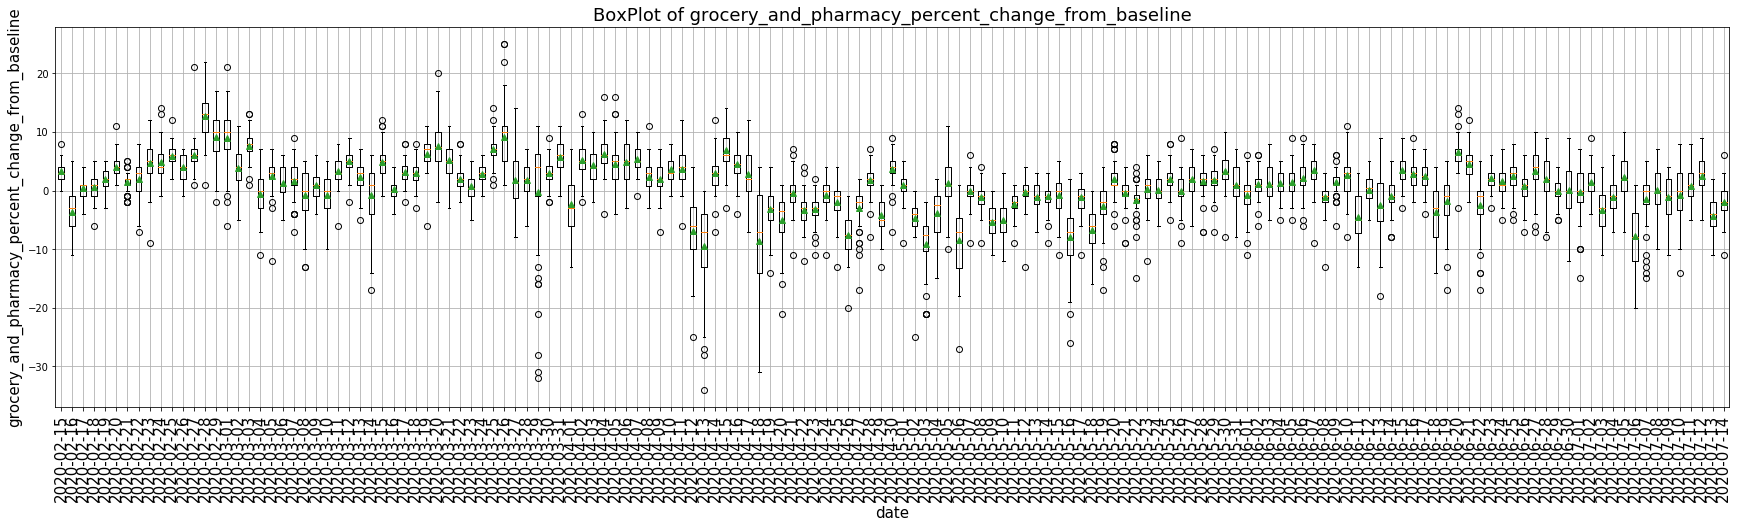

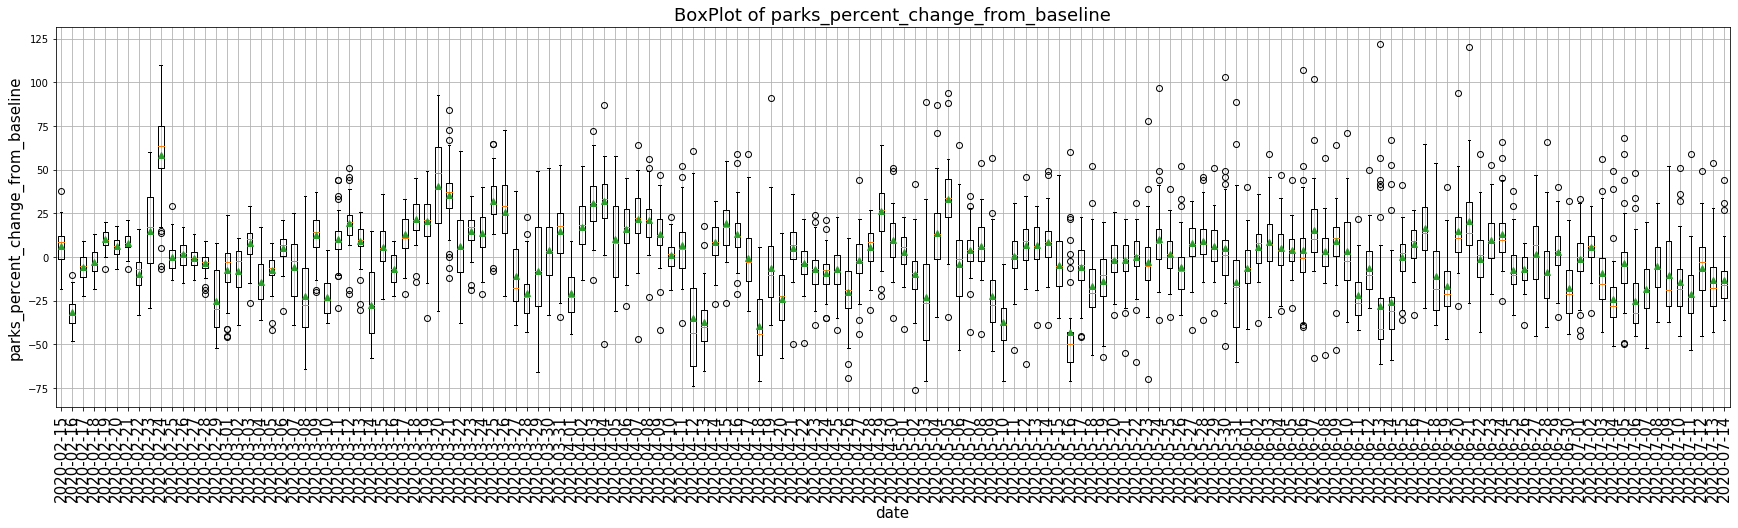

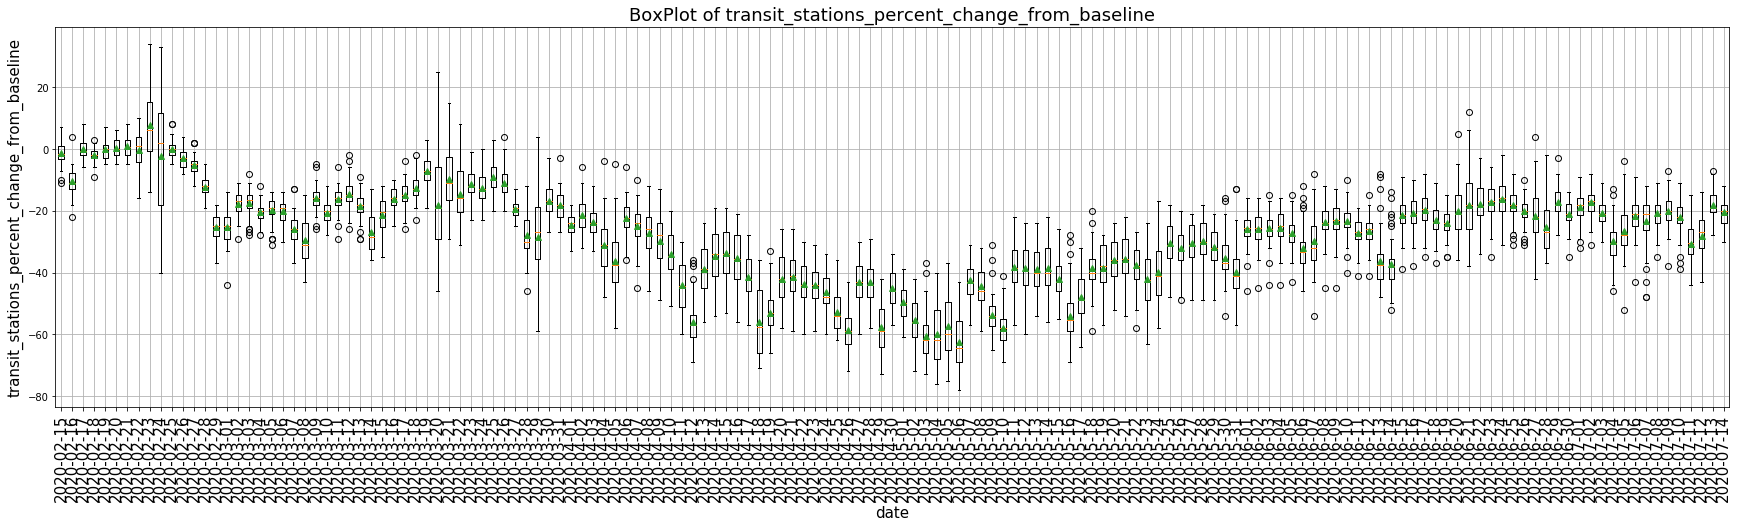

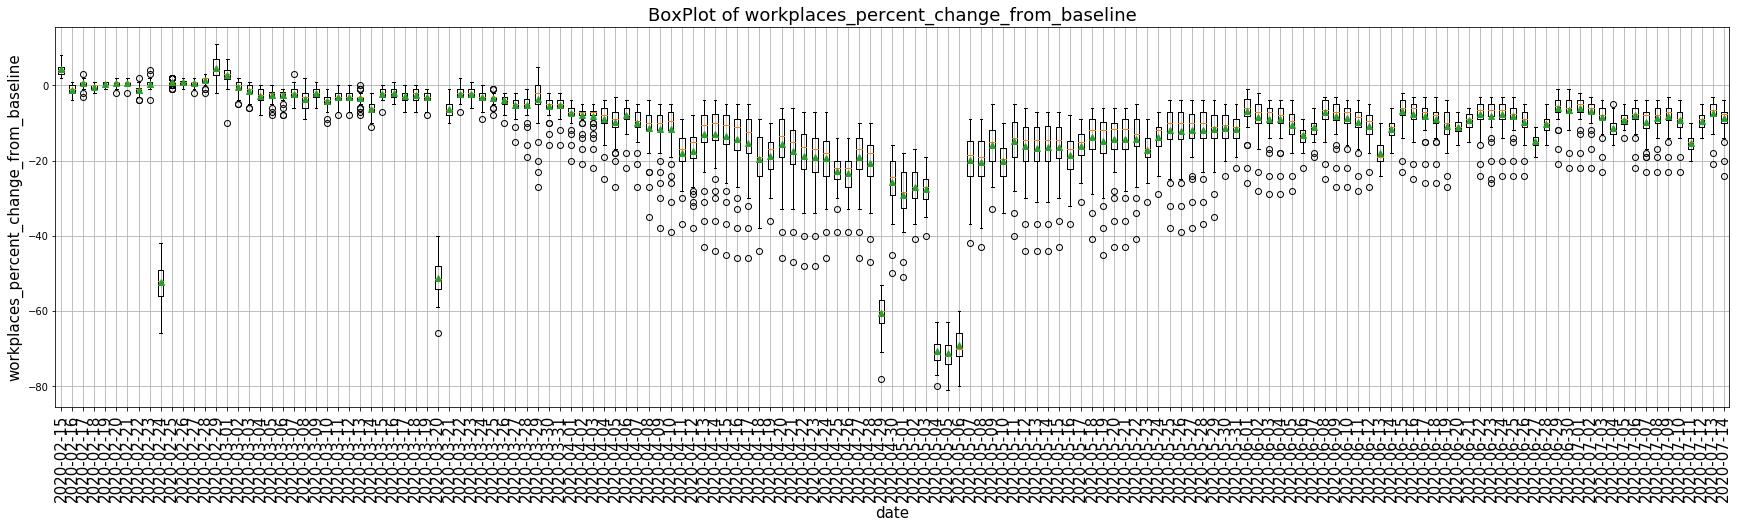

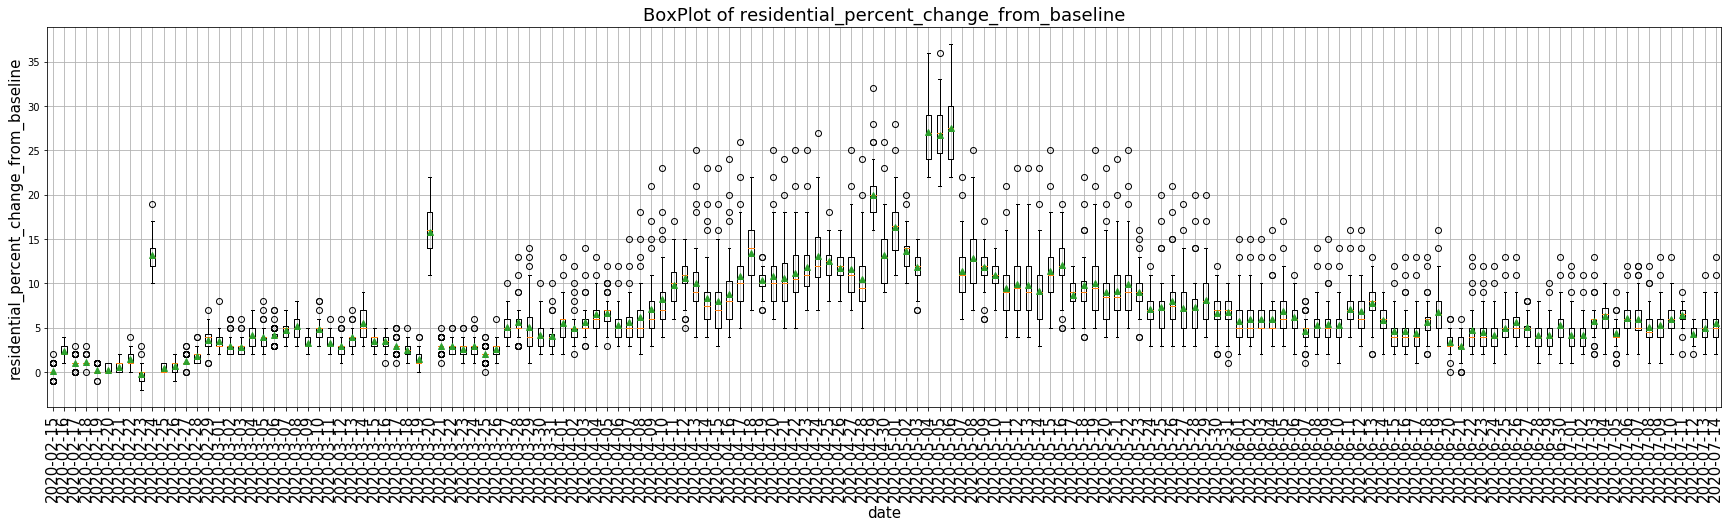

In [13]:
for column in target_columns:
    plot_all_japan_mobility(column)

## 地図上に落とし込んでみましょう

### 都道府県レベルでの1ヶ月の平均値モビリティトレンドをプロット
日本国内の都道府県レベルでのモビリティトレンドを地図上に表示します。
ここでは、2020年月6月のデータを用いて地図を作成します。
まずは、2020年6月の日本のデータを抽出します。

In [ ]:
JPjune = JP[(JP['date']>='2020-06-01')&(JP['date']<='2020-06-30')]

In [14]:
# 都道府県ごとの１ヶ月のモビリティトレンドの平均値を抽出します。
JPjune_mobility_mean = JPjune.groupby('sub_region_1')[target_columns].mean()
JPjune_mobility_mean.sample(5)

### 境界データのダウンロードと作成
続いて、地図として表示するための準備として、都道府県の境界データをダウンロードします。

**国土数値情報行政区域データ（全国, 世界測地系）を任意の場所へダウンロードして、解凍してください。**

In [16]:
# 次の1行のパスは、国土数値情報行政区域データをダウンロードした任意の場所に書き換えてください
# path_to_boundary_data = '../assets/data/N03-20220101_GML/N03-22_220101.shp'
path_to_boundary_data = '~/Downloads/N03-20220101_GML/N03-22_220101.shp'
jpn_shp = gpd.read_file(path_to_boundary_data)
# 行政区域データは都道府県レベルの境界以外も含まれているため、今回は都道府県レベルの境界データのみを抽出します
prf_shp = jpn_shp[(jpn_shp['N03_001'].notnull())&
                  (jpn_shp['N03_002'].isnull())&
                  (jpn_shp['N03_003'].isnull())&
                  (jpn_shp['N03_004'].isnull())&
                  (jpn_shp['N03_007'].isnull())]

prf_shp.head(2)

In [ ]:
# `prf_shp`の`N03_001`にある都道府県名を英語名に変換し`pref_en`というあたらしい列に入れます
prf_ja2en ={
    '北海道': 'Hokkaido', '青森県': 'Aomori', '岩手県': 'Iwate', '宮城県': 'Miyagi',
    '秋田県': 'Akita', '山形県': 'Yamagata', '福島県': 'Fukushima', '茨城県': 'Ibaraki',
    '栃木県': 'Tochigi', '群馬県': 'Gunma', '埼玉県': 'Saitama', '千葉県': 'Chiba','東京都': 'Tokyo',
    '神奈川県': 'Kanagawa', '新潟県': 'Niigata', '富山県': 'Toyama', '石川県': 'Ishikawa',
    '福井県': 'Fukui', '山梨県': 'Yamanashi', '長野県': 'Nagano', '岐阜県': 'Gifu', '静岡県': 'Shizuoka',
    '愛知県': 'Aichi', '三重県': 'Mie', '滋賀県': 'Shiga', '京都府': 'Kyoto', '大阪府': 'Osaka',
    '兵庫県': 'Hyogo', '奈良県': 'Nara', '和歌山県': 'Wakayama', '鳥取県': 'Tottori',
    '島根県': 'Shimane', '岡山県': 'Okayama', '広島県': 'Hiroshima', '山口県': 'Yamaguchi',
    '徳島県': 'Tokushima', '香川県': 'Kagawa', '愛媛県': 'Ehime', '高知県': 'Kochi',
    '福岡県': 'Fukuoka', '佐賀県': 'Saga', '長崎県': 'Nagasaki', '熊本県': 'Kumamoto',
    '大分県': 'Oita', '宮崎県': 'Miyazaki', '鹿児島県': 'Kagoshima', '沖縄県': 'Okinawa'}
prf_shp['pref_en'] = prf_shp['N03_001'].map(prf_ja2en)
prf_shp.head(2)

In [ ]:
# 都道府県別の2020年6月のモビリティトレンドの平均値を格納した`JPjune_mobility_mean`に境界データをマージします
JPjune_mobility_mean_geo = JPjune_mobility_mean.merge(
                            prf_shp, left_index = True, right_on = 'pref_en', how = 'left')

## 東京都の日次モビリティトレンドのプロット

In [ ]:
# 東京都の2020年のデータのみを抽出してDataFrameに格納
tokyo = JP[(JP['sub_region_1'].isin(['Tokyo']))&
          (JP['date']<'2021-01-01')]

In [ ]:
tokyo.reset_index(drop=True, inplace=True)

In [ ]:
plt.figure(figsize=(30,10))
for column in target_columns:
    plt.plot(tokyo['date'],tokyo[column], label = column.split('_')[0])
plt.axhline(0, color = 'red', linestyle='-')
plt.legend(fontsize=15, frameon=False)
plt.title('Mobility Percent Changes from Baseline in Tokyo', fontsize=15)
plt.grid()
plt.show()

## 2020年6月の世界のMobilityの変化率

In [24]:
print("Number of countries in df: {}".format(len(df['country_region'].unique())))

Number of countries in df: 135


In [ ]:
# 6月のデータのみを抽出して新しいDataFrameに格納
df.loc[:, 'month'] = df['date'].dt.month
June = df[df['month'].isin([6])]

In [27]:
# geopandasから世界地図のGeoDataFrameをダウンロード
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)
world.head(2)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


`world`の`geometry`列にポリゴンが入っています。
国名`name`で6月のDataFrame`June`とマージしたいが、表記ゆれが多いため簡単にマージできません。
そこで、DataFrame`June`の国名`country_region`を`world`で用いられている`iso_a3`コードに変換して、コードを基準にマージします。
DataFrame`June`の国名をisoのコードに変換するために、今回は`pycountry`というパッケージを用います。

In [29]:

def name2code(name):
    try: 
        country_object = pycountry.countries.search_fuzzy(name)[0]
        code = country_object.alpha_3
        return code
    except:
        return ''

In [30]:
country_code_dict = {}
for country in June['country_region'].unique():
    country_code_dict[country] = name2code(country)

In [31]:
# パッケージ`pycountry`で変換できなかった国名を確認します。
[k for k, v in country_code_dict.items() if v == '']

['Cape Verde', 'South Korea', 'Laos', 'Myanmar (Burma)']

In [32]:
# これらの国については、手動でコードを入力します。
country_code_dict['South Korea'] = 'KOR'
country_code_dict['Cape Verde'] = 'CPV'
country_code_dict['Laos'] = 'LAO'
country_code_dict['Myanmar (Burma)'] = 'MMR'

`map`を用いて、データフレーム`June`の`country_region`に上で作成した国名とコードが対応する辞書`country_code_dict`を適用させて、isoコードを格納する列`iso_a3`を作成します。

In [33]:
June = June.groupby(['country_region']).median().reset_index()
June.loc[:,'iso_a3'] = June.loc[:, 'country_region'].map(country_code_dict)

In [35]:
# 2020年6月のMobilityデータと各国の境界のデータをマージします。
June_geo = June.merge(world, left_on = 'iso_a3', right_on='iso_a3', how='outer')

array(['Antigua and Barbuda', 'Aruba', 'Bahrain', 'Barbados',
       'Cape Verde', 'France', 'Hong Kong', 'Liechtenstein', 'Malta',
       'Mauritius', 'Norway', 'Réunion', 'Singapore'], dtype=object)

In [36]:
# 可視化のためGeoDataFrameに変換します。
gdf = gpd.GeoDataFrame(June_geo, geometry=June_geo['geometry'])

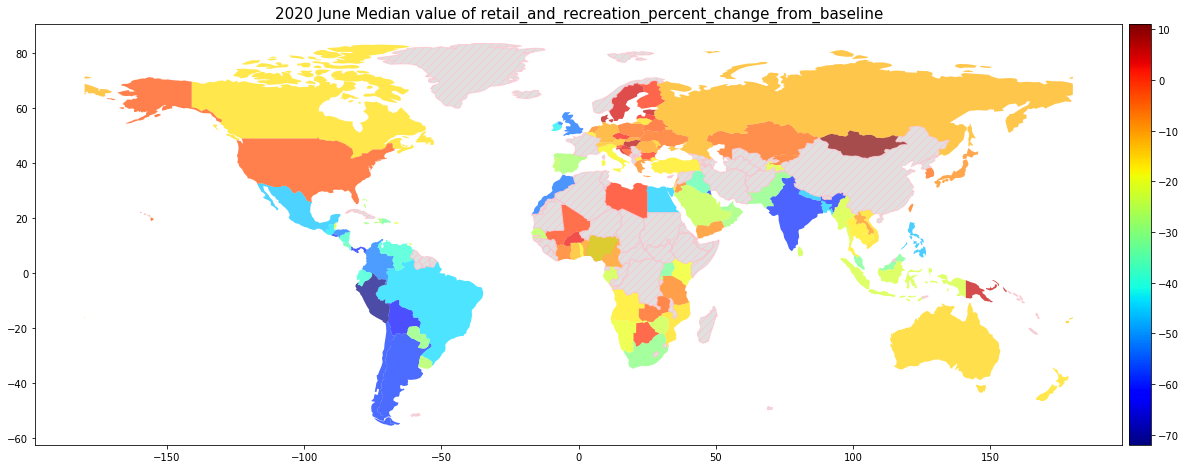

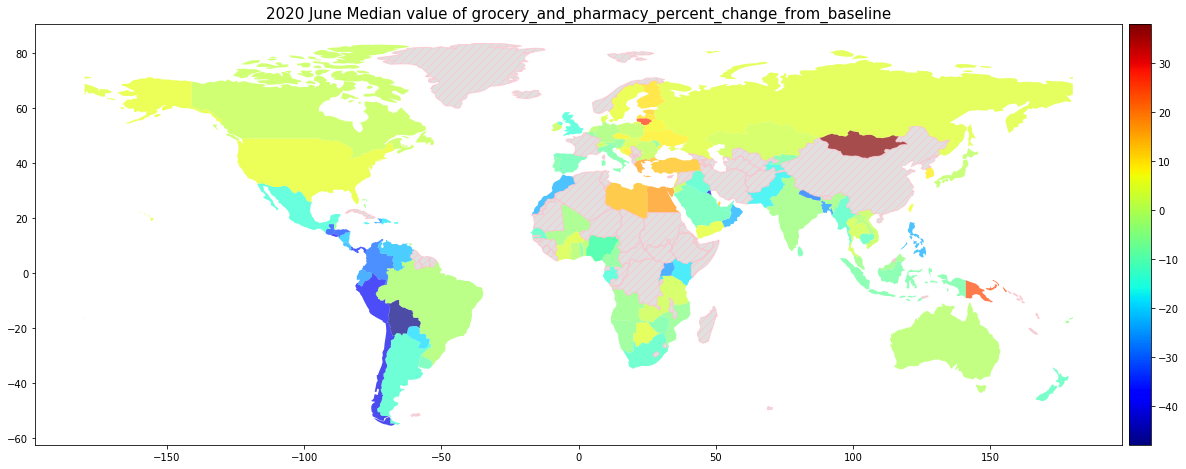

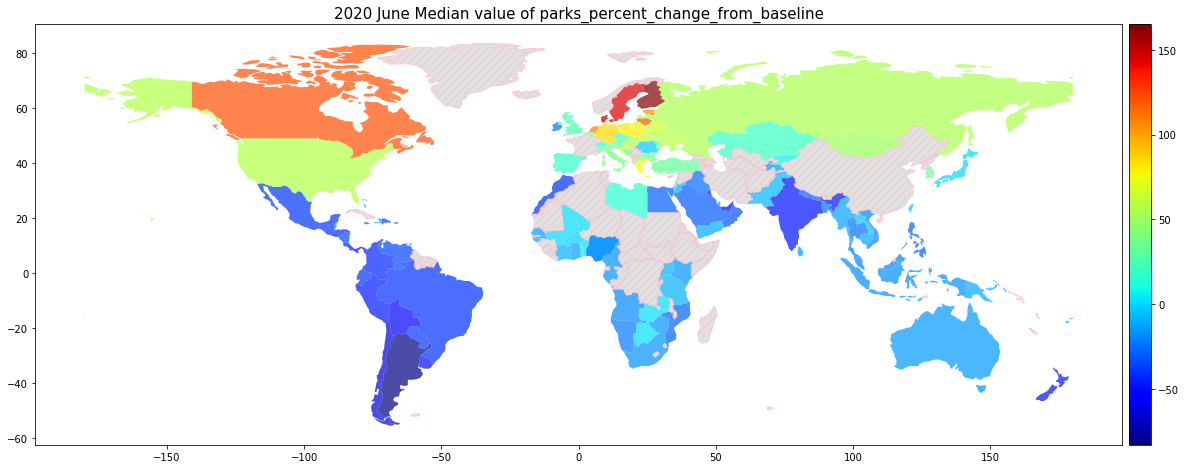

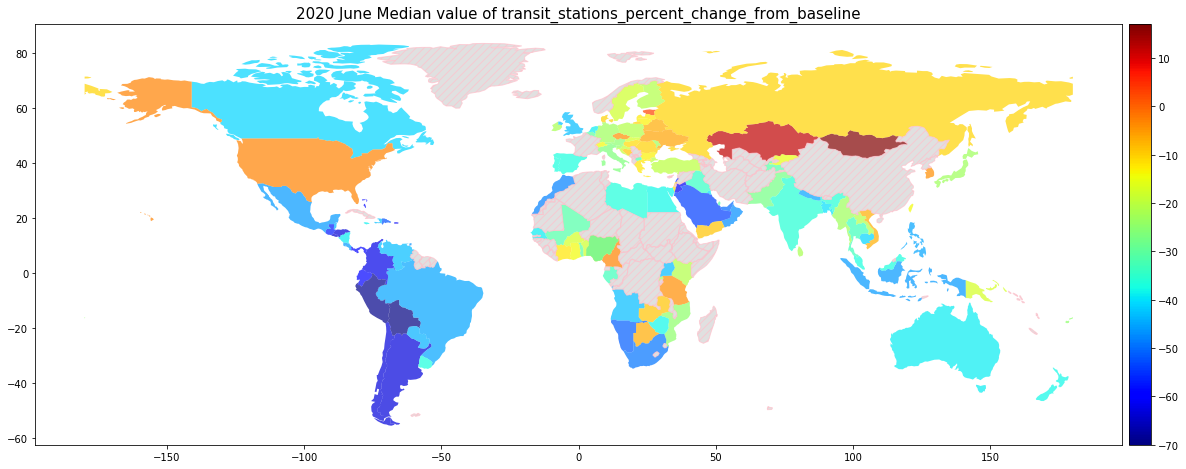

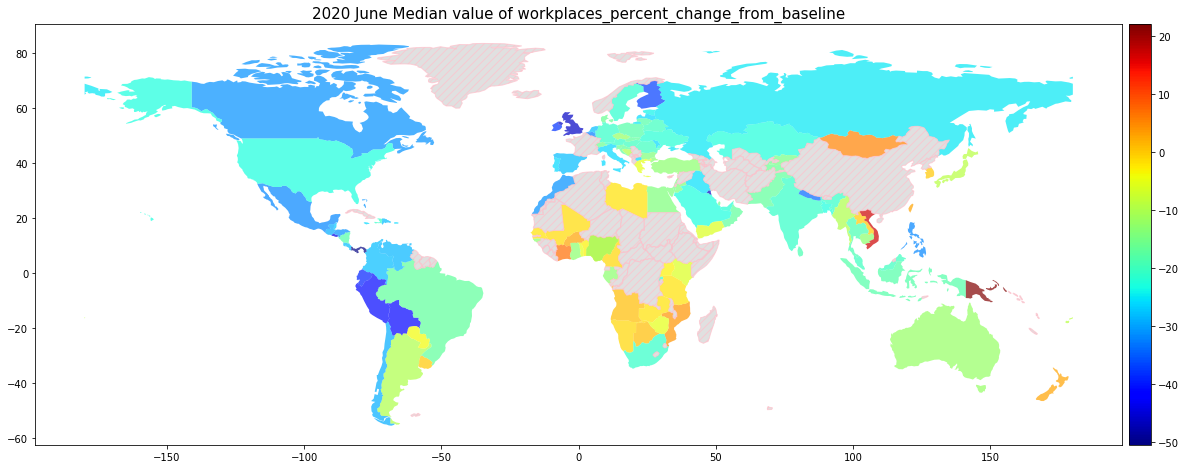

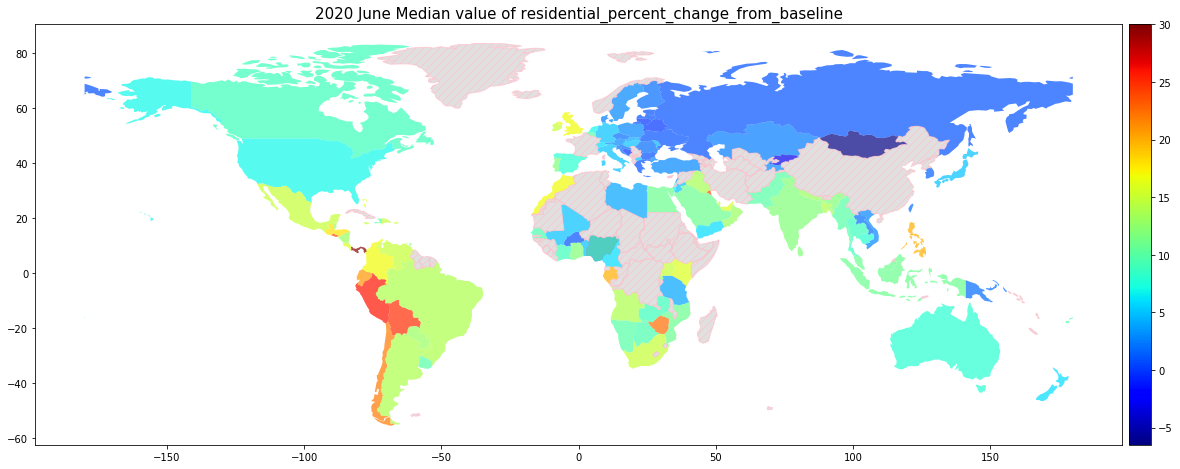

In [37]:
gdf = gdf[(gdf['pop_est']>0) & (gdf.name!="Antarctica")]

for column in ['retail_and_recreation_percent_change_from_baseline',
               'grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline',
               'transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline',
               'residential_percent_change_from_baseline']:
    fig, ax = plt.subplots(1, 1, figsize=(20,18))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.1)
    gdf.plot(column=column, ax = ax, 
             legend = True, cmap='Spectral', 
             alpha=.7, cax = cax, 
             missing_kwds={
                 "color": "lightgrey", 
                 "edgecolor": "pink",
                 "hatch": "///",
                 "label": "Missing values"})
    ax.set_title("2020 June Median value of {}".format(column), fontsize= 15)
    plt.show()